In [1]:
%pylab

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
from __future__ import print_function

%matplotlib inline

In [3]:
from __future__ import print_function

import csv
from src import main, utils
import sys

projects = main.load_projects()

snapshot_frms = dict()
changeset_frms = dict()

for project in projects:
    goldsets = main.load_goldsets(project)
    snapshot_ranks = main.read_ranks(project, "release")
    changeset_ranks = main.read_ranks(project, "changeset")


    snapshot_frms[project] = dict( (y,(x,z)) for x,y,z in main.get_frms(goldsets, snapshot_ranks))
    changeset_frms[project] = dict( (y,(x,z)) for x,y,z in  main.get_frms(goldsets, changeset_ranks))

In [4]:
maxes = dict()

for project in projects:
    repos = main.load_repos(project)
    corpus = main.create_release_corpus(project, repos)
    maxes[project] = len(corpus)

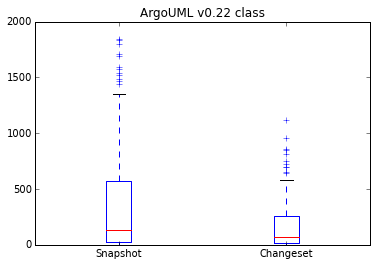

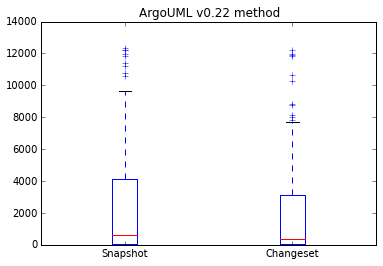

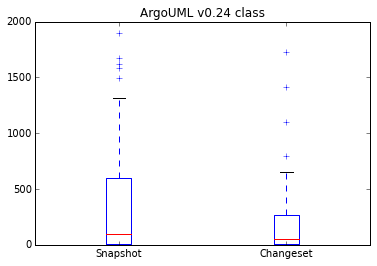

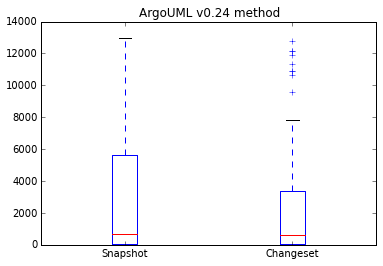

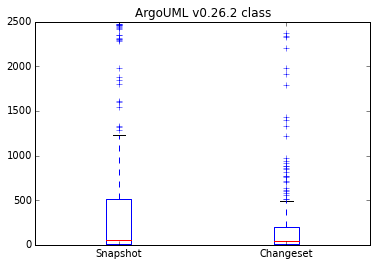

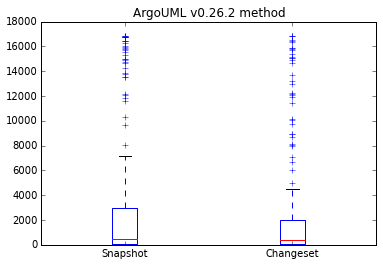

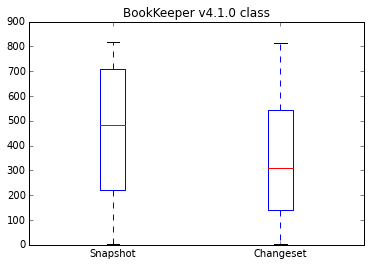

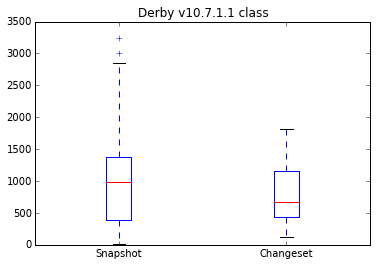

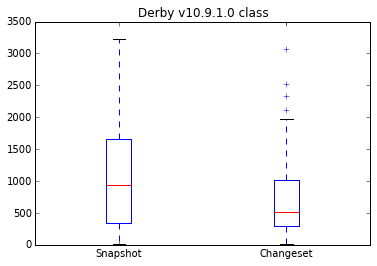

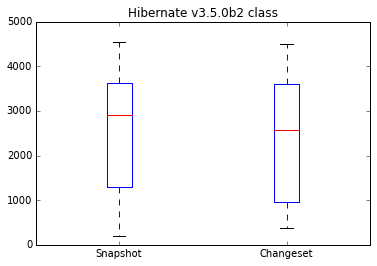

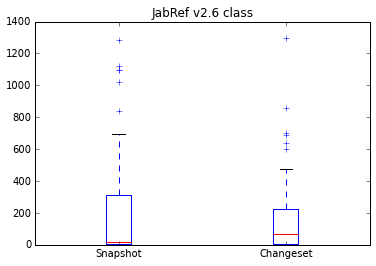

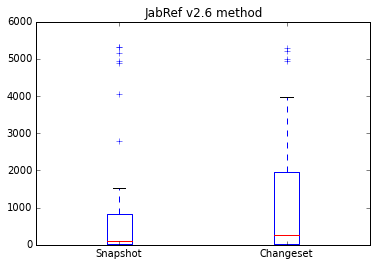

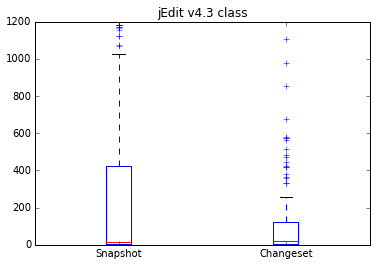

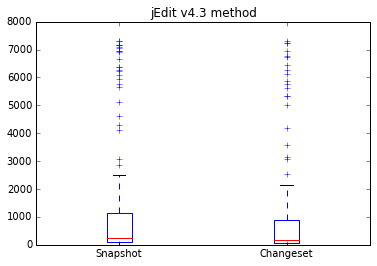

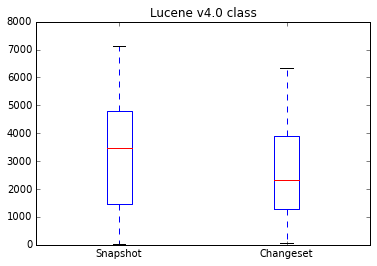

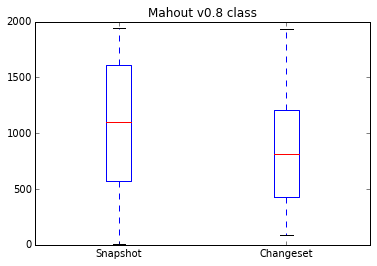

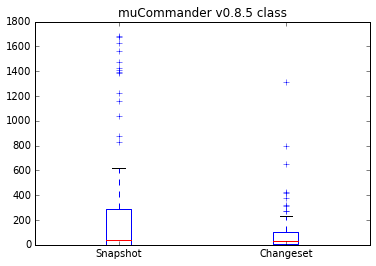

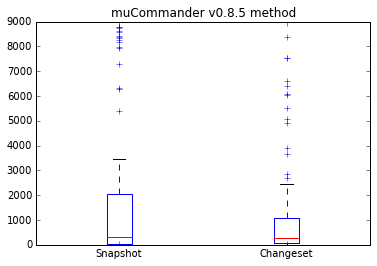

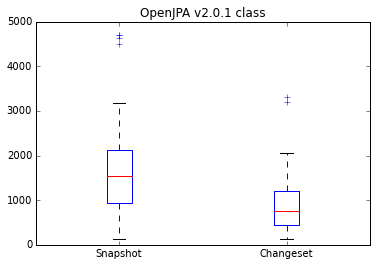

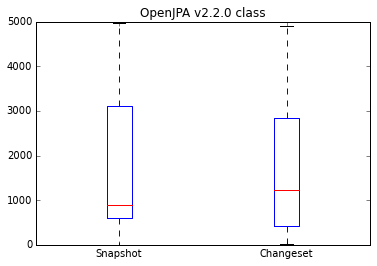

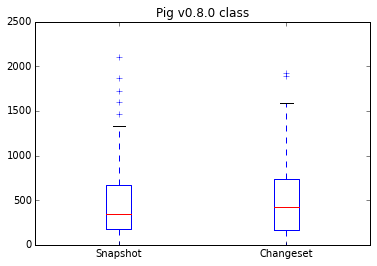

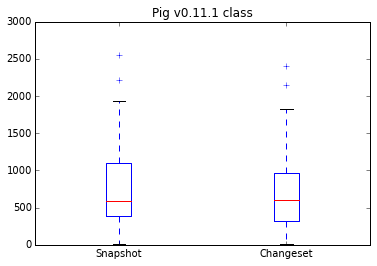

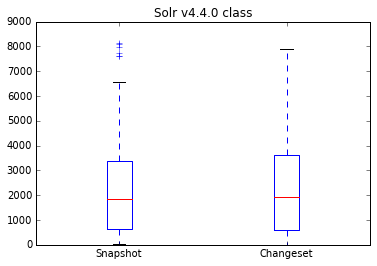

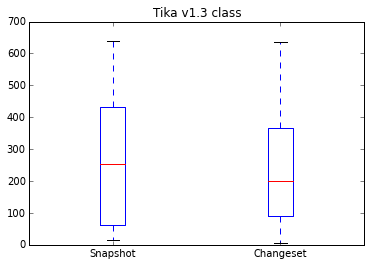

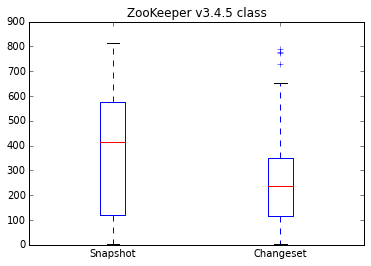

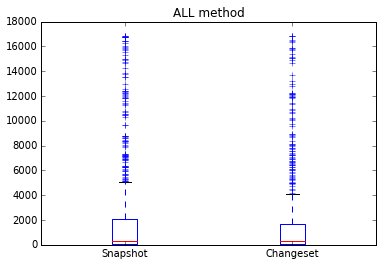

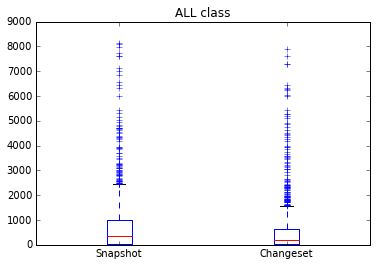

In [14]:
snapshot_all_method = list()
changeset_all_method = list()
snapshot_all_class = list()
changeset_all_class = list()

for i, project in enumerate(projects):
    fig = pyplot.figure(i)
    ax = pyplot.subplot(111)
    snapshot_norm = [ frm[0] for gid, frm in snapshot_frms[project].items() ]
    changeset_norm = [ frm[0] for gid, frm in changeset_frms[project].items() ]
    if project.level == 'method':
        snapshot_all_method.extend(snapshot_norm)
        changeset_all_method.extend(changeset_norm)
    else:
        snapshot_all_class.extend(snapshot_norm)
        changeset_all_class.extend(changeset_norm)
        
    ax.boxplot([snapshot_norm, changeset_norm], labels=["Snapshot", "Changeset"])
    pyplot.title(" ".join([project.printable_name, project.version, project.level]))
    
fig = pyplot.figure(len(projects))
ax = pyplot.subplot(111)
ax.boxplot([snapshot_all_method, changeset_all_method], labels=["Snapshot", "Changeset"])
pyplot.title("ALL method")
                                                                
                                                                    
fig = pyplot.figure(len(projects) + 1)
ax = pyplot.subplot(111)
ax.boxplot([snapshot_all_class, changeset_all_class], labels=["Snapshot", "Changeset"])
pyplot.title("ALL class")


pyplot.show()

In [20]:

for lvl in ['class', 'method']:
    print()
    print(lvl)
    ones = list()
    same = list()
    in10 = list()
    in50 = list()
    in500 = list()
    in100 = list()
    in1000 = list()
    other = list()
    total = 0

    for project in projects:
        if project.level == lvl:
            for gid, snapshot_frm in snapshot_frms[project].items():
                if gid not in changeset_frms[project]:
                    print("Skipping gid:", gid) # should not happen
                    continue

                total += 1
                changeset_frm = changeset_frms[project][gid]
                a = abs(snapshot_frm[0] - changeset_frm[0])
                if snapshot_frm[0] == 1 and changeset_frm[0] == 1:
                    ones.append(gid)
                if a == 0:
                    same.append(gid)
                if a < 10:
                    in10.append(gid)
                if a < 50:
                    in50.append(gid)
                else:
                    other.append(gid)

    print("ones:", len(ones), float(len(ones)) / total)
    print("same:", len(same), float(len(same)) / total)
    print("in10:", len(in10), float(len(in10)) / total)
    print("in50:", len(in50), float(len(in50)) / total)
    print("in100:", len(in100), float(len(in100)) / total)
    print("in500:", len(in500), float(len(in500)) / total)
    print("in1000:", len(in1000), float(len(in1000)) / total)
    print("other:", len(other), float(len(other)) / total)
    print("total", total)



class
ones: 17 0.0140032948929
same: 30 0.0247116968699
in10: 178 0.146622734761
in50: 356 0.293245469522
in100: 0 0.0
in500: 0 0.0
in1000: 0 0.0
other: 858 0.706754530478
total 1214

method
ones: 7 0.0111287758347
same: 12 0.0190779014308
in10: 65 0.10333863275
in50: 151 0.240063593005
in100: 0 0.0
in500: 0 0.0
in1000: 0 0.0
other: 478 0.759936406995
total 629
